In [33]:
%matplotlib inline
from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

#----------------------------------------------------------------------
##  BLOCK OF FUNCTIONS USED IN THE MAIN CODE
#----------------------------------------------------------------------

def initialstate(N):   
    ''' generates a random spin configuration for initial condition'''
    state = 2*np.random.randint(2, size=(N,N))-1
    return state


def mcmove(config, beta):
    '''Monte Carlo move using Metropolis algorithm '''
    for i in range(N):
        for j in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                s =  config[a, b]
                nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                cost = 2*s*nb
                if cost < 0:
                    #print("cost=", cost)
                    s *= -1
                elif rand() < np.exp(-cost*beta):
                    s *= -1
                config[a, b] = s
    return config


def calcEnergy(config):
    '''Energy of a given configuration'''
    energy = 0
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -nb*S
    return energy/4.


def calcMag(config):
    '''Magnetization of a given configuration'''
    mag = np.sum(config)
    return mag


In [36]:

## change the parameter below if you want to simulate a smaller system
nt      = 2#2**8        # number of temperature points
N       = 2**4        # size of the lattice, N x N
eqSteps = 2**10       # number of MC sweeps for equilibration
mcSteps = 2**10       # number of MC sweeps for calculation

n1, n2  = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N)
tm = 2.269;    T=np.random.normal(tm, .64, nt)
T  = T[(T>1.2) & (T<3.8)];    nt = np.size(T)

#print(T)

Energy       = np.zeros(nt);   Magnetization  = np.zeros(nt)
SpecificHeat = np.zeros(nt);   Susceptibility = np.zeros(nt)


#----------------------------------------------------------------------
#  MAIN PART OF THE CODE
#----------------------------------------------------------------------
for m in range(len(T)):
    E1 = M1 = E2 = M2 = 0
    config = initialstate(N)
    iT=1.0/T[m]; iT2=iT*iT;
    
    for i in range(eqSteps):         # equilibrate
        #print("equilibrium: ", i)
        mcmove(config, iT)           # Monte Carlo moves

    for i in range(mcSteps):
        #print("moves: ", i)
        mcmove(config, iT)           
        Ene = calcEnergy(config)     # calculate the energy
        Mag = calcMag(config)        # calculate the magnetisation

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag 
        E2 = E2 + Ene*Ene

    Energy[m]         = n1*E1
    Magnetization[m]  = n1*M1
    SpecificHeat[m]   = (n1*E2 - n2*E1*E1)*iT2
    Susceptibility[m] = (n1*M2 - n2*M1*M1)*iT

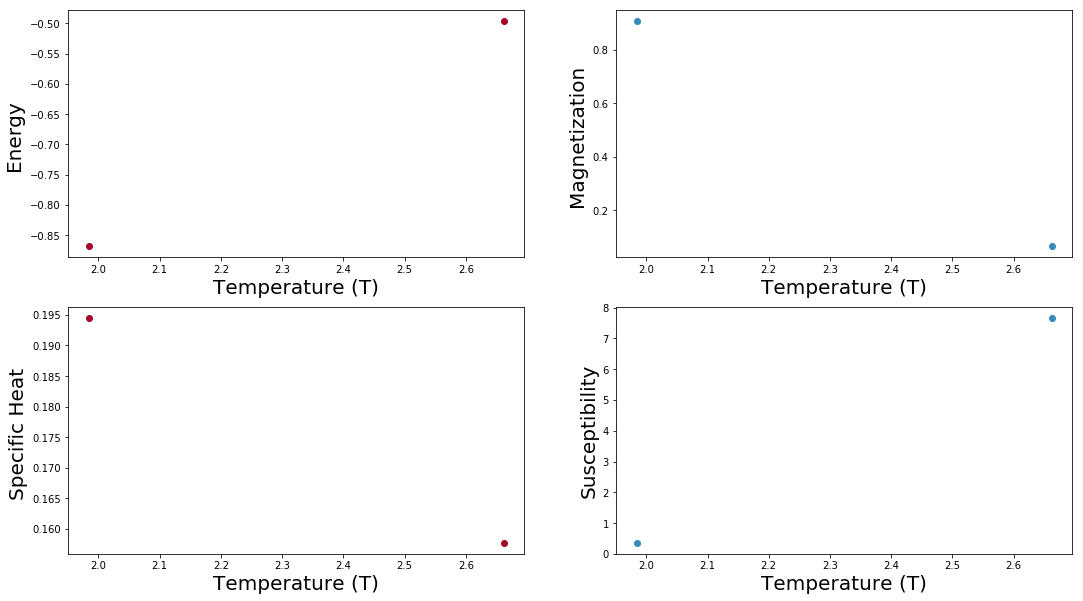

In [37]:
f = plt.figure(figsize=(18, 10)); # plot the calculated values    

sp =  f.add_subplot(2, 2, 1 );
#print(T)
#print(Energy)
plt.plot(T, Energy, 'o', color="#A60628");
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);

sp =  f.add_subplot(2, 2, 2 );
plt.plot(T, abs(Magnetization), 'o', color="#348ABD");
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Magnetization ", fontsize=20);

sp =  f.add_subplot(2, 2, 3 );
plt.plot(T, SpecificHeat, 'o', color="#A60628");
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Specific Heat ", fontsize=20);

sp =  f.add_subplot(2, 2, 4 );
plt.plot(T, Susceptibility, 'o', color="#348ABD");
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Susceptibility", fontsize=20);


In [19]:
%matplotlib inline
# Simulating the Ising model
from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

class Ising():
    ''' Simulating the Ising model '''    
    ## monte carlo moves
    def mcmove(self, config, N, beta):
        ''' This is to execute the monte carlo moves using 
        Metropolis algorithm such that detailed
        balance condition is satisified'''
        for i in range(N):
            for j in range(N):            
                    a = np.random.randint(0, N)
                    b = np.random.randint(0, N)
                    s =  config[a, b]
                    nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                    cost = 2*s*nb
                    if cost < 0:	
                        s *= -1
                    elif rand() < np.exp(-cost*beta):
                        s *= -1
                    config[a, b] = s
        return config
    
    def simulate(self):   
        ''' This module simulates the Ising model'''
        N, temp     = 64, 2        # Initialse the lattice
        config = 2*np.random.randint(2, size=(N,N))-1
        f = plt.figure(figsize=(15, 15), dpi=80);    
        self.configPlot(f, config, 0, N, 1);
        
        #msrmnt = 1001
        #for i in range(msrmnt):
        #    self.mcmove(config, N, 1.0/temp)
        #    if i == 1:       self.configPlot(f, config, i, N, 2);
        #    if i == 4:       self.configPlot(f, config, i, N, 3);
        #    if i == 32:      self.configPlot(f, config, i, N, 4);
        #    if i == 100:     self.configPlot(f, config, i, N, 5);
        #    if i == 1000:    self.configPlot(f, config, i, N, 6);
                 
                    
    def configPlot(self, f, config, i, N, n_):
        ''' This modules plts the configuration once passed to it along with time etc '''
        X, Y = np.meshgrid(range(N), range(N))
        sp =  f.add_subplot(3, 3, n_ )  
        plt.setp(sp.get_yticklabels(), visible=False)
        plt.setp(sp.get_xticklabels(), visible=False)      
        plt.pcolormesh(X, Y, config, cmap=plt.cm.RdBu);
        plt.title('Time=%d'%i); plt.axis('tight')    
    plt.show()

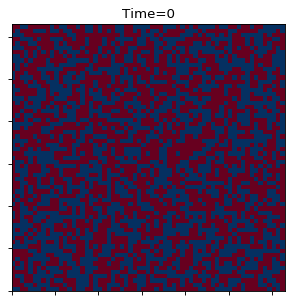

In [20]:
rm = Ising()

rm.simulate()

